In [1]:
!pip install streamlit

  Using cached toml-0.10.2-py2.py3-none-any.whl (16 kB)
  Using cached gitdb-4.0.11-py3-none-any.whl.metadata (1.2 kB)
  Using cached smmap-5.0.1-py3-none-any.whl.metadata (4.3 kB)
  Using cached mdurl-0.1.2-py3-none-any.whl (10.0 kB)
   ---------------------------------------- 0.0/8.4 MB ? eta -:--:--
   ---------------------------------------- 0.0/8.4 MB ? eta -:--:--
   ---------------------------------------- 0.0/8.4 MB ? eta -:--:--
   ---------------------------------------- 0.0/8.4 MB ? eta -:--:--
   ---------------------------------------- 0.0/8.4 MB ? eta -:--:--
   ---------------------------------------- 0.0/8.4 MB ? eta -:--:--
   ---------------------------------------- 0.0/8.4 MB 146.3 kB/s eta 0:00:58
   ---------------------------------------- 0.0/8.4 MB 146.3 kB/s eta 0:00:58
   ---------------------------------------- 0.0/8.4 MB 131.3 kB/s eta 0:01:04
   ---------------------------------------- 0.0/8.4 MB 131.3 kB/s eta 0:01:04
   ------------------------------------

In [1]:
#loading required libraries
import pandas as pd
import numpy as np

# Visualisations
import matplotlib.pyplot as plt

# Correlation test
from scipy import stats
from scipy.stats import pearsonr

# RMSE
from sklearn.metrics import mean_squared_error,r2_score

# Splitting the data
from sklearn.model_selection import train_test_split

# Linear Regression library
from sklearn.linear_model import LinearRegression

# Statitistical Tests - Z-Test
from statsmodels.stats.weightstats import ztest as ztest

# OLS Regression
import statsmodels.api as sm

#Suppressing warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
MODIS = pd.read_csv(r'D:\Data Science\Nigeria Proj\Intermediate\GEE Data\Nigeria_LGAs_NDVI.csv')
VIIRS = pd.read_csv(r'D:\Data Science\Nigeria Proj\Intermediate\GEE Data\VIIRS_Admin2.csv')

In [3]:
def resampling_monthly(data1:pd.DataFrame)  -> pd.DataFrame:

    data1['date'] = [x.replace('_','-') for x in data1['imageId']]
    data1['date'] = pd.to_datetime(data1['date'])
    data1.set_index('date', inplace=True)
    data1.drop(['system:index','.geo','imageId'], inplace=True, axis=1)
    data1 = data1.resample('M').mean()
    return data1

In [4]:
MODIS_monthly = resampling_monthly(MODIS)
VIIRS_monthly = resampling_monthly(VIIRS)
VIIRS_monthly.head()

,Aba North,Aba South,Abadam,Abaji,Abak,Abakalik,Abeokuta South,AbeokutaNorth,Abi,Aboh-Mba,...,Yorro,Yunusari,Yusufari,Zaki,Zango,ZangonKa,Zaria,Zing,Zurmi,Zuru
date,,,,,,,,,,,,,,,,,,,,,
2012-01-31,0.268050,0.352281,0.203542,0.340406,0.488667,0.408824,0.257684,0.328152,0.437751,0.562139,...,0.308477,0.215817,0.215293,0.224780,0.251446,0.355974,0.260375,0.281968,0.232465,0.261489
2012-02-29,0.238335,0.347813,0.183005,0.343562,0.484379,0.402268,0.307991,0.400243,0.476098,0.548303,...,0.284626,0.202036,0.204313,0.210428,0.233412,0.365204,0.240121,0.254186,0.217644,0.214421
2012-03-31,0.230205,0.324954,0.167582,0.374476,0.468733,0.351400,0.376365,0.494969,0.459950,0.542266,...,0.251443,0.190596,0.190096,0.186877,0.217856,0.366408,0.190373,0.201932,0.203069,0.218718
2012-04-30,0.319688,0.452718,0.171129,0.479652,0.628705,0.515800,0.463213,0.666513,0.587324,0.687049,...,0.335465,0.172199,0.175954,0.198484,0.213826,0.495384,0.254241,0.289355,0.200079,0.252201
2012-05-31,0.379905,0.550024,0.188501,0.634682,0.685151,0.605596,0.462132,0.690816,0.625174,0.691367,...,0.476443,0.191726,0.196864,0.207498,0.202747,0.589854,0.319782,0.455816,0.221730,0.282207


In [7]:
MODIS_monthly =  MODIS_monthly[MODIS_monthly.index >= '2012-01-17'] 

In [68]:
idx = int(input("Enter the number that will represent the region that you want to analyse: "))
print(MODIS_monthly.columns[idx])

Abadam


In [69]:
def correlation_VIIRS_MODIS(data1:pd.DataFrame,data2:pd.DataFrame) -> str:
    """
    Here we are going to be carrying out correlation analysis between the different MODIS and VIIRS LGAs
    """
    
    data = pd.concat([data1.iloc[:,idx], data2.iloc[:,idx]], axis=1)

    corrs = data.corr()

    corrs.columns = [f'{data1.columns[idx]}_MODIS',f"{data1.columns[idx]}_VIIRS"]

    return f"The correlation between MODIS and VIIRS for {data1.columns[idx]} is {corrs.iloc[1][0]}"




In [70]:
correlation_VIIRS_MODIS(MODIS_monthly,VIIRS_monthly)

'The correlation between MODIS and VIIRS for Abadam is 0.9833653115538817'

In [71]:
def plots(data1:pd.DataFrame, data2:pd.DataFrame):
    data = pd.concat([data1.iloc[:,idx], data2.iloc[:,idx]], axis=1)
    data.columns = [f'{data1.columns[idx]}_MODIS',f"{data1.columns[idx]}_VIIRS"]
    return data.plot(figsize=(20,10), title=f"Temporal Plot between MODIS and VIIRS for {data.columns[0]}")
# Plotting the line plot between two datasets

<Axes: title={'center': 'Temporal Plot between MODIS and VIIRS for Abadam_MODIS'}, xlabel='date'>

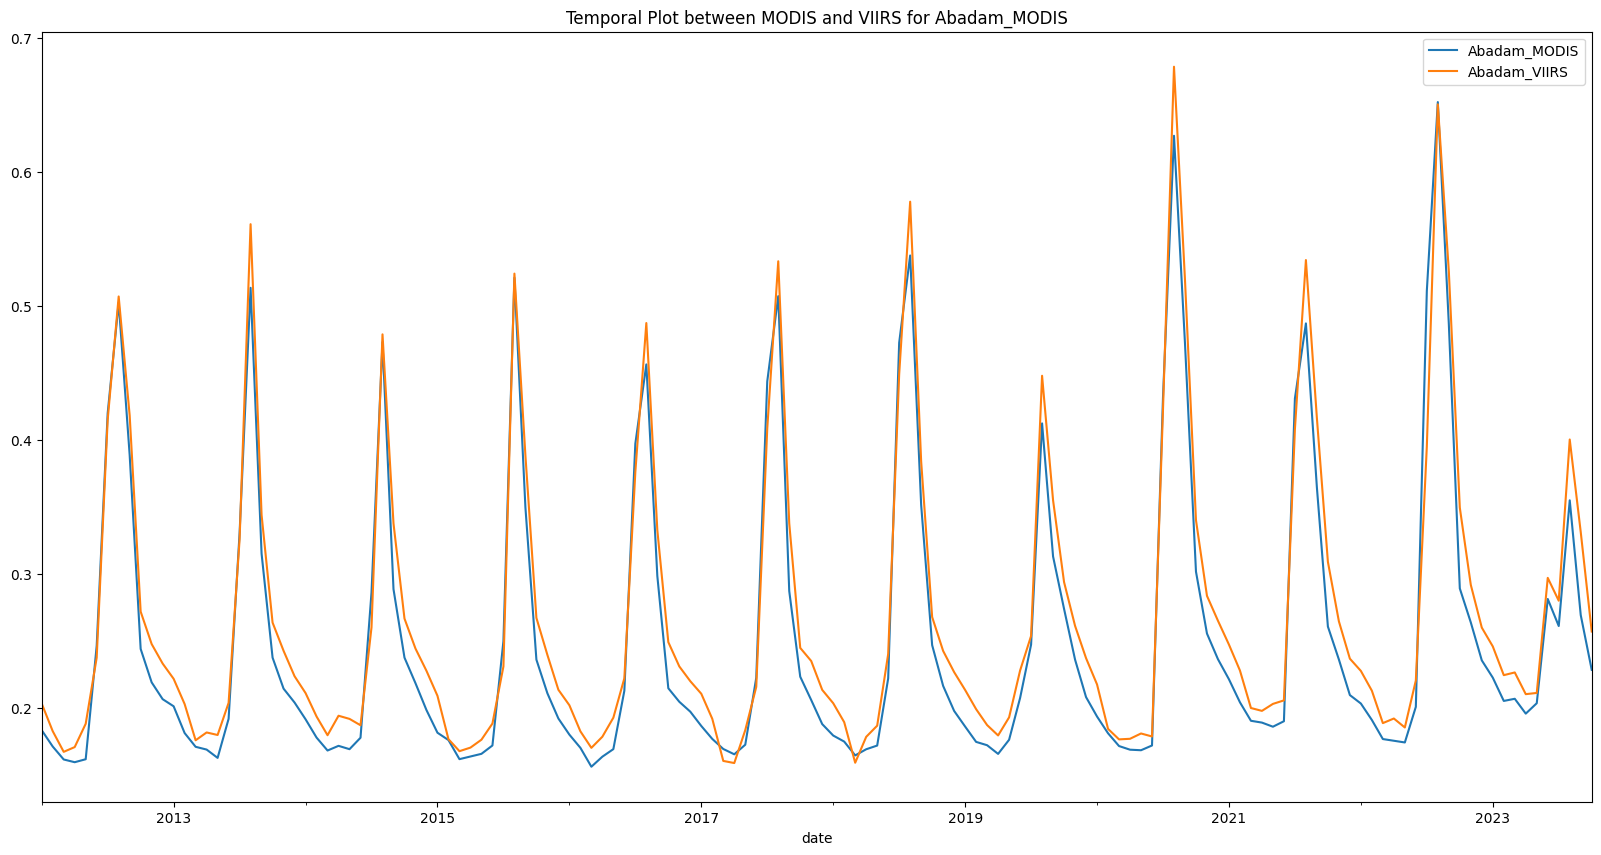

In [72]:
plots(MODIS_monthly, VIIRS_monthly)

In [115]:
def regression(x:pd.DataFrame,y:pd.DataFrame)->float:
    """
    This function performs a simple linear regression analysis on the MODIS and VIIRS data sets seeing how well the VIIRS data can 
    be used to explain the discontinued MODIS data
    """
    X_train, y_train, X_test, y_test = x.iloc[-int(0.7*x.shape[0]):], y.iloc[-int(0.7*y.shape[0]):],x.iloc[:-int(0.7*x.shape[0])],y.iloc[:-int(0.7*x.shape[0])]
    reg = LinearRegression()
    reg.fit(np.array(X_train.iloc[:,idx]).reshape(-1,1),np.array(y_train.iloc[:,idx]).reshape(-1,1))
    y_pred = reg.predict(np.array(X_test.iloc[:,idx]).reshape(-1,1))
    return f"The root mean squared of {X_train.columns[idx]} is {np.sqrt(mean_squared_error(y_pred,y_test.iloc[:,idx]))} and the Adjusted Rsquared is {reg.score(np.array(X_train.iloc[:,idx]).reshape(-1,1), np.array(y_train.iloc[:,idx]).reshape(-1,1))}"
    

In [116]:
regression(VIIRS_monthly, MODIS_monthly)

'The root mean squared of Abadam is 0.014855054559530154 and the Adjusted Rsquared is 0.964050883289261'